# IntroStat Week 8

Welcome to the 8th lecture in IntroStat

During the lectures we will present both slides and notebooks. 

This is the notebook used in the lecture in week 8.


In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.power as smp


### Example: Height and weight

Linear regression with height and weight data

In [16]:
# data
x = np.array([168, 161, 167, 179, 184, 166, 198, 187, 191, 179])             # height data
y = np.array([65.5, 58.3, 68.1, 85.7, 80.5, 63.4, 102.6, 91.4, 86.7, 78.9])  # weight data

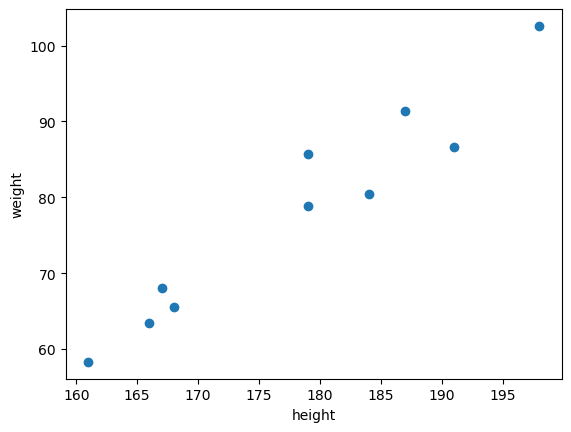

In [17]:
# make scatter plot:
plt.scatter(x,y)
plt.ylabel("weight")
plt.xlabel("height")
plt.show()

Linear relationship?

Now lets put data into a **pandas dataframe**:

In [18]:
student = pd.DataFrame({'x': x, 'y': y})  # "import pandas as pd"
print(student)

     x      y
0  168   65.5
1  161   58.3
2  167   68.1
3  179   85.7
4  184   80.5
5  166   63.4
6  198  102.6
7  187   91.4
8  191   86.7
9  179   78.9


Now we do a **linear regression model**:

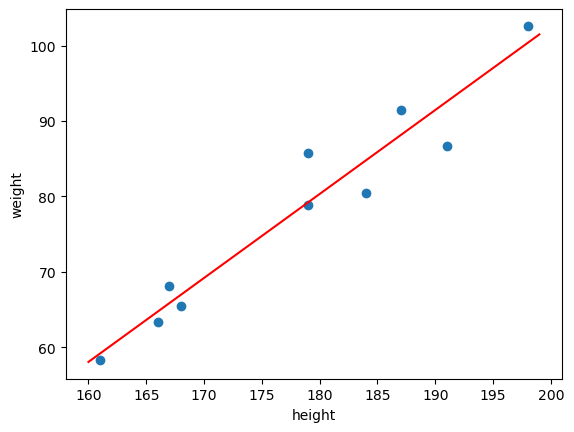

In [19]:
# for now we just run the code, we will understand it later

# fit the model
fitStudents = smf.ols(formula = 'y ~ x', data=student).fit()  # OBS: use the statsmodels.formula.api library (smf)

# Get prediction and confidence intervals
x_pred = pd.DataFrame({'x': np.arange(160,200, 1)})
pred = fitStudents.get_prediction(x_pred).summary_frame(alpha=0.05)

plt.scatter(x,y)
plt.plot(x_pred, pred["mean"], color="red")
plt.ylabel("weight")
plt.xlabel("height")
plt.show()

The red line is the **regression line**.

The regression line is a straight line.



It is defined by a **slope** and an **intercept** with the y-axis.

In [20]:
# later today we will be able to estimate values for the parameters: intercept and slope
print(fitStudents.summary(slim=True))


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.924
No. Observations:                  10   F-statistic:                     110.3
Covariance Type:            nonrobust   Prob (F-statistic):           5.87e-06
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -119.9581     18.897     -6.348      0.000    -163.535     -76.381
x              1.1127      0.106     10.504      0.000       0.868       1.357

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.


c:\Users\skhalid\Miniconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [22]:
# we will also be able to estimate standard error and conficence intervals for the parameters (also in table above)

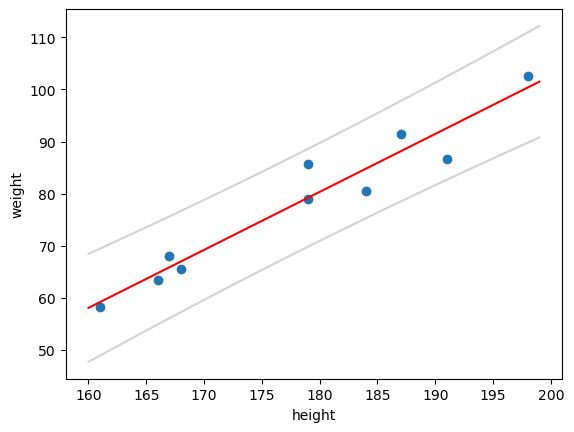

In [6]:
# later today we will be able to make a prediction interval for "future" obervations (with other x-values)
plt.scatter(x,y)
plt.plot(x_pred, pred["mean"], color="red")
plt.plot(x_pred, pred["obs_ci_lower"], color="lightgrey")
plt.plot(x_pred, pred["obs_ci_upper"], color="lightgrey")
plt.ylabel("weight")
plt.xlabel("height")
plt.show()


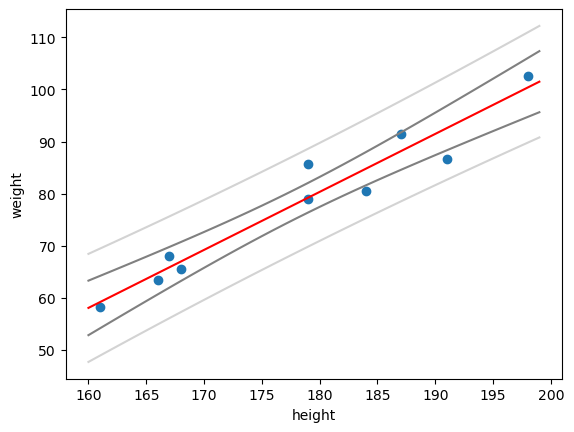

In [7]:
# and later today we will also be able to make a prediction interval for the mean at every value on the x-axis
plt.scatter(x,y)
plt.plot(x_pred, pred["mean"], color="red")
plt.plot(x_pred, pred["mean_ci_lower"], color="grey")
plt.plot(x_pred, pred["mean_ci_upper"], color="grey")
plt.plot(x_pred, pred["obs_ci_lower"], color="lightgrey")
plt.plot(x_pred, pred["obs_ci_upper"], color="lightgrey")
plt.ylabel("weight")
plt.xlabel("height")
plt.show()


### Example: Estimating parameters $\beta_0$ and $\beta_1$

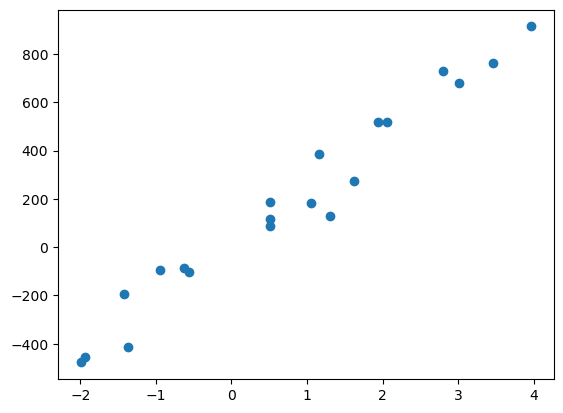

In [8]:
# First we compute some simulated data, so we know the "real" beta_0 and beta_1 (and sigma)
np.random.seed(23498)

beta_0 = 50
beta_1 = 200
sigma = 90

# choose som random x-values:
x = stats.uniform.rvs(size = 20, loc=-2, scale = 6)
# simulate y-values from statistical model:
y = beta_0 + beta_1*x + stats.norm.rvs(size = 20, loc=0, scale = sigma)

plt.scatter(x,y)
plt.show()

This is now our "Toy Data" :-)

Lets see if we can estimate the parameters 

In [11]:
# calculate estimates beta_0_hat and beta_1_hat:
Sxx = np.sum((x - x.mean())**2)

beta_1_hat = np.sum((x - x.mean())*(y - y.mean())) / Sxx
beta_0_hat = y.mean() - beta_1_hat*x.mean()

print(beta_0_hat, beta_1_hat)
print(beta_0, beta_1)

13.795479789979595 225.76353862601528
50 200


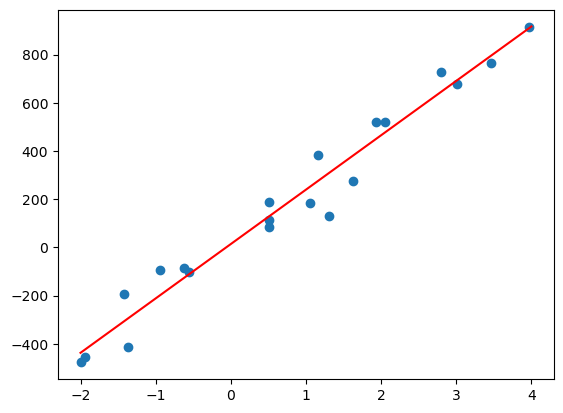

In [12]:
# plot estimated model with data:
plt.scatter(x,y)
plt.plot([-2,4], [beta_0_hat + beta_1_hat*(-2), beta_0_hat + beta_1_hat*(4)], color="red")
plt.show()


Great! 

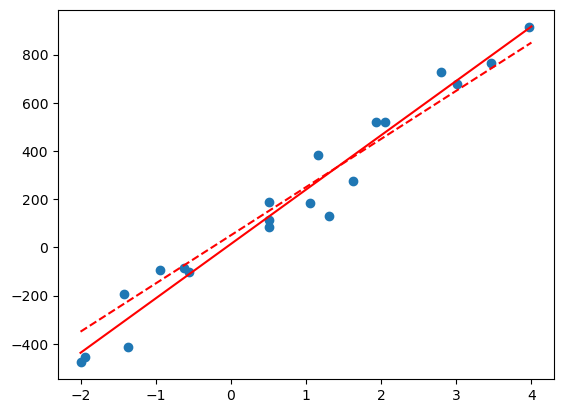

In [13]:
# also plot the "true" underlying model (this is *only* possible because we have simulated data - IRL one cannot plot the "true" model):
plt.scatter(x,y)
plt.plot([-2,4], [beta_0_hat + beta_1_hat*(-2), beta_0_hat + beta_1_hat*(4)], color="red")
plt.plot([-2,4], [beta_0 + beta_1*(-2), beta_0 + beta_1*(4)], color="red", linestyle='--')
plt.show()

### Example: Variation of $\beta_0$ and $\beta_1$

73.84511187771452 194.84106802781554


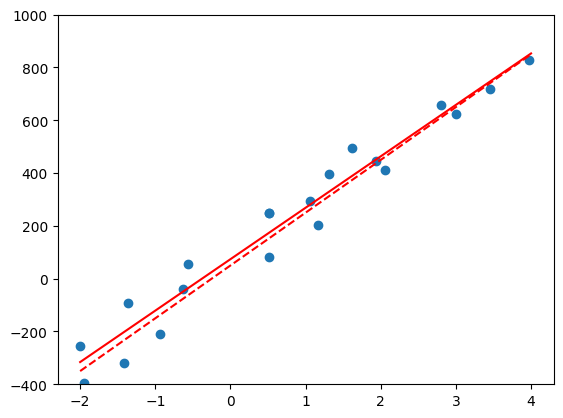

In [29]:
# repeat with new sample:
y = beta_0 + beta_1*x + stats.norm.rvs(size = 20, loc=0, scale = sigma) # y-data with new values of residuals

# re-calculate parameters
Sxx = np.sum((x - x.mean())**2)
beta_1_hat = np.sum((x - x.mean())*(y - y.mean())) / Sxx
beta_0_hat = y.mean() - beta_1_hat*x.mean()
print(beta_0_hat, beta_1_hat)

#plot:
plt.scatter(x,y)
plt.plot([-2,4], [beta_0_hat + beta_1_hat*(-2), beta_0_hat + beta_1_hat*(4)], color="red")
plt.plot([-2,4], [beta_0 + beta_1*(-2), beta_0 + beta_1*(4)], color="red", linestyle='--')
plt.ylim([-400,1000])
plt.show()

### Example: Estimate parameters and their standard errors (height and weight data)

In [30]:
# Recall the height and weigth data:
print(student)

     x      y
0  168   65.5
1  161   58.3
2  167   68.1
3  179   85.7
4  184   80.5
5  166   63.4
6  198  102.6
7  187   91.4
8  191   86.7
9  179   78.9


In [31]:
### 1 ###  Estimate parameters beta_0_hat and bata_1_hat *manually*

Sxx = np.sum((student["x"] - student["x"].mean())**2)

beta_1_hat = np.sum((student["x"] - student["x"].mean())*(student["y"] - student["y"].mean())) / Sxx

beta_0_hat = student["y"].mean() - beta_1_hat*student["x"].mean()

print(beta_0_hat, beta_1_hat)

-119.95810730253355 1.11274217585693


In [32]:
### 2 ###  Estimate standard error for the parameters *manually* 

student["y_pred"] = beta_0_hat + beta_1_hat*student["x"]
student["residuals"] = student["y"] - student["y_pred"]
print(student)

     x      y      y_pred  residuals
0  168   65.5   66.982578  -1.482578
1  161   58.3   59.193383  -0.893383
2  167   68.1   65.869836   2.230164
3  179   85.7   79.222742   6.477258
4  184   80.5   84.786453  -4.286453
5  166   63.4   64.757094  -1.357094
6  198  102.6  100.364844   2.235156
7  187   91.4   88.124680   3.275320
8  191   86.7   92.575648  -5.875648
9  179   78.9   79.222742  -0.322742


### Theorem 5.8 (second part)
Since ${\sigma}^2$ is unknown, we use the central estimate for ${\sigma}^2$


$\hat{\sigma}^2 = \frac{RSS(\hat{\beta}_0, \hat{\beta}_1)}{n - 2} = \frac{\sum_{i=1}^n e_i^2}{n - 2}$

where:
- $ \hat{\sigma}^2 $ is the estimated variance of the errors,
- $ RSS(\hat{\beta}_0, \hat{\beta}_1) $ is the residual sum of squares for the estimates $\hat{\beta}_0$ and $\hat{\beta}_1$,
- $ n $ is the number of observations,
- $ e_i $ represents the residuals (errors) for each observation $ i $.

$\hat{\sigma}_{\beta_0} = \hat{\sigma} \sqrt{\frac{1}{n} + \frac{\bar{x}^2}{S_{xx}}}$

$\hat{\sigma}_{\beta_1} = \hat{\sigma} \sqrt{\frac{1}{S_{xx}}}$

In [33]:
RSS = np.sum(student["residuals"]**2)
sigma_hat = np.sqrt(RSS/(10-2))

se_beta_0_hat = sigma_hat*np.sqrt(1/10 + student["x"].mean()**2 / Sxx)

se_beta_1_hat = sigma_hat*np.sqrt(1/Sxx)

print(se_beta_0_hat, se_beta_1_hat)

18.897051763916973 0.10593909266894098


In [14]:
### automatic ###  Do it all with inbuilt python function smf.ols
fitStudents = smf.ols(formula = 'y ~ x', data=student).fit()  # OBS: use the statsmodels.formula.api library (smf)
print(fitStudents.summary(slim=True))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.924
No. Observations:                  10   F-statistic:                     110.3
Covariance Type:            nonrobust   Prob (F-statistic):           5.87e-06
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -119.9581     18.897     -6.348      0.000    -163.535     -76.381
x              1.1127      0.106     10.504      0.000       0.868       1.357

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.


c:\Users\skhalid\Miniconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [35]:
# Get parameters
print(fitStudents.params)

Intercept   -119.958107
x              1.112742
dtype: float64


In [36]:
# Get parameter standard errors
print(fitStudents.bse)

Intercept    18.897052
x             0.105939
dtype: float64


In [37]:
# get estimate of sigma^2:
print(fitStudents.scale)
print(sigma_hat**2) #compare to the one we calculated *manualy*

15.061388599105827
15.06138859910578


In [38]:
# get fitted values:
print(fitStudents.fittedvalues)

0     66.982578
1     59.193383
2     65.869836
3     79.222742
4     84.786453
5     64.757094
6    100.364844
7     88.124680
8     92.575648
9     79.222742
dtype: float64


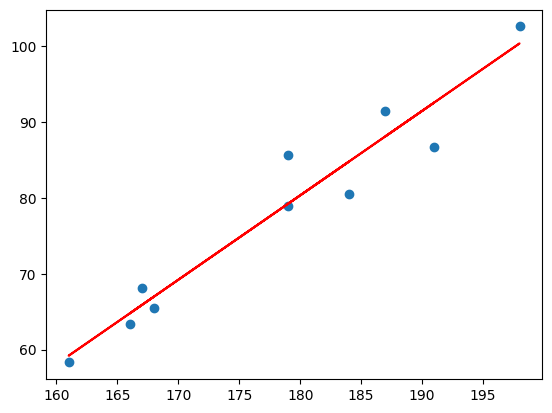

In [39]:
# plot:
plt.scatter(student["x"], student["y"])
plt.plot(student["x"], fitStudents.fittedvalues, color="red")
plt.show()

### Example: Hypothesis test for parameters

In [40]:
fitStudents = smf.ols(formula = 'y ~ x', data=student).fit()  # OBS: use the statsmodels.formula.api library (smf)
print(fitStudents.summary(slim=True))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.924
No. Observations:                  10   F-statistic:                     110.3
Covariance Type:            nonrobust   Prob (F-statistic):           5.87e-06
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -119.9581     18.897     -6.348      0.000    -163.535     -76.381
x              1.1127      0.106     10.504      0.000       0.868       1.357

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.


c:\Users\pydni\AppData\Local\anaconda3\envs\pernille\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [41]:
# Warning!! The p-values appear to be zero but they are in reality only smaller than 0.000

# print the pvalues seperately to be sure:
print(fitStudents.pvalues)

Intercept    0.000221
x            0.000006
dtype: float64


In [42]:
# we can also do the test manually (here only for the intercept):

# calculate "t_obs"
t_obs_int = -119.9581/18.897
print(t_obs_int)

-6.347997036566651


In [43]:
# find corresponding pvalue:
print(2*stats.t.cdf(t_obs_int, df=10-2))  # obs! df = n - 2  (2 is the number of parameters)

0.00022108433338164315


### Example: Confidence interval for parameters

In [44]:
fitStudents = smf.ols(formula = 'y ~ x', data=student).fit()  
print(fitStudents.summary(slim=True))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.924
No. Observations:                  10   F-statistic:                     110.3
Covariance Type:            nonrobust   Prob (F-statistic):           5.87e-06
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -119.9581     18.897     -6.348      0.000    -163.535     -76.381
x              1.1127      0.106     10.504      0.000       0.868       1.357

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.


c:\Users\pydni\AppData\Local\anaconda3\envs\pernille\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [45]:
# we can also calculate CI *manually*

# here only for the intercept:

print(-119.9581 + stats.t.ppf(0.025, df=10-2)*18.897)
print(-119.9581 - stats.t.ppf(0.025, df=10-2)*18.897)

-163.53466013972562
-76.38153986027439


### Example: Confidence interval for the line

In [46]:
# Simulated data from underlying linear model:
np.random.seed(23498)

beta_0 = 50
beta_1 = 200
sigma = 90

# choose som random x-values:
x = stats.uniform.rvs(size = 20, loc=-2, scale = 6)
# simulate y-values from statistical model:
y = beta_0 + beta_1*x + stats.norm.rvs(size = 20, loc=0, scale = sigma)

data = pd.DataFrame({'x': x, 'y': y})  # OBS: use the pandas library (pd)
print(data)

           x           y
0   0.507929   85.844021
1   1.935535  519.486580
2   1.619628  275.358640
3  -1.996896 -477.868342
4  -1.363155 -413.276293
5   1.304766  131.195526
6   3.004870  679.832200
7   3.459938  764.296535
8   2.056708  520.693047
9  -0.629292  -84.292611
10  0.506390  115.618570
11 -0.562325 -101.450199
12  1.056394  182.941453
13  2.801986  729.915799
14 -1.942645 -455.967857
15  0.509977  188.065774
16  3.968193  914.620017
17  1.163689  385.099272
18 -1.418796 -194.803230
19 -0.938826  -92.997100


This is new set of "Toy data"

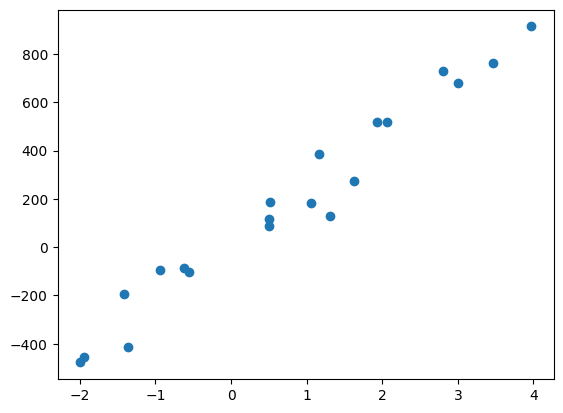

In [47]:
plt.scatter(data["x"],data["y"])
plt.show()

In [48]:
# fit a linear regression model
linfit = smf.ols(formula = 'y ~ x', data=data).fit()
print(linfit.summary(slim=True))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.961
No. Observations:                  20   F-statistic:                     468.9
Covariance Type:            nonrobust   Prob (F-statistic):           2.43e-14
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.7955     19.969      0.691      0.498     -28.157      55.748
x            225.7635     10.426     21.655      0.000     203.860     247.667

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.


In [49]:
# Make predictions and confidence intervals
x_pred = pd.DataFrame({'x': np.arange(-2,4,.01)})

pred = linfit.get_prediction(x_pred).summary_frame(alpha=0.05) 

print(pred.head())

         mean    mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0 -437.731597  34.066943    -509.303589    -366.159606   -624.530446   
1 -435.473962  33.979179    -506.861567    -364.086357   -622.202241   
2 -433.216327  33.891507    -504.419741    -362.012912   -619.874265   
3 -430.958691  33.803930    -501.978113    -359.939269   -617.546521   
4 -428.701056  33.716448    -499.536685    -357.865427   -615.219007   

   obs_ci_upper  
0   -250.932749  
1   -248.745683  
2   -246.558388  
3   -244.370862  
4   -242.183105  


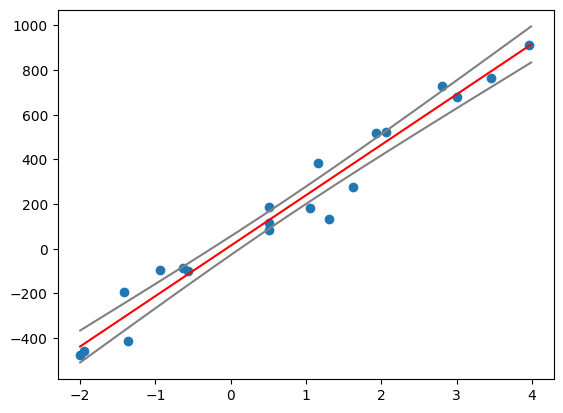

In [50]:
# plot all the predictions:
plt.scatter(data["x"],data["y"])
plt.plot(x_pred, pred["mean"], color="red")
plt.plot(x_pred, pred["mean_ci_lower"], color="grey")
plt.plot(x_pred, pred["mean_ci_upper"], color="grey")
plt.show()

We could also calculate this interval *manually*  

### Example: Prediction interval for parameters

In [51]:
# Same data as above

# now we want the prediction interval for individual (new/future) observations

print(pred.head())

         mean    mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0 -437.731597  34.066943    -509.303589    -366.159606   -624.530446   
1 -435.473962  33.979179    -506.861567    -364.086357   -622.202241   
2 -433.216327  33.891507    -504.419741    -362.012912   -619.874265   
3 -430.958691  33.803930    -501.978113    -359.939269   -617.546521   
4 -428.701056  33.716448    -499.536685    -357.865427   -615.219007   

   obs_ci_upper  
0   -250.932749  
1   -248.745683  
2   -246.558388  
3   -244.370862  
4   -242.183105  


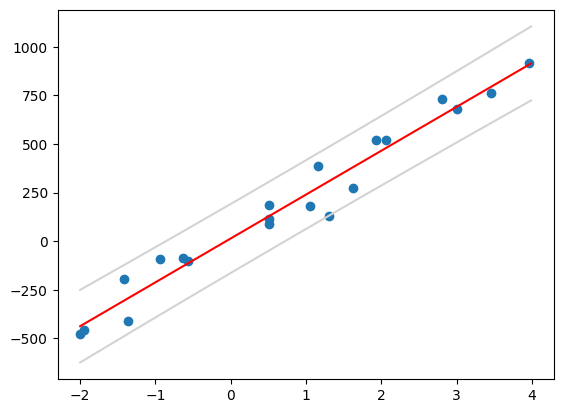

In [52]:
# plot all the predictions:
plt.scatter(data["x"],data["y"])
plt.plot(x_pred, pred["mean"], color="red")
plt.plot(x_pred, pred["obs_ci_lower"], color="lightgrey")
plt.plot(x_pred, pred["obs_ci_upper"], color="lightgrey")
plt.show()

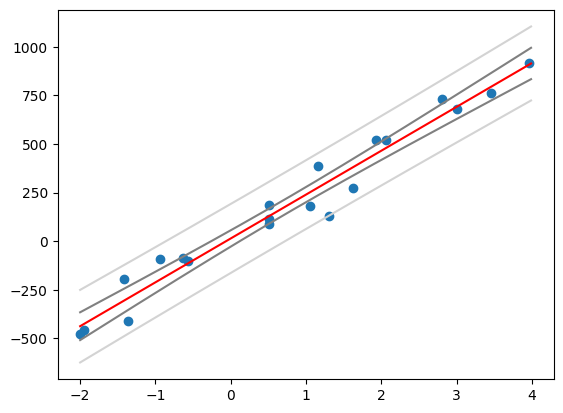

In [53]:
# plot all the predictions:
plt.scatter(data["x"],data["y"])
plt.plot(x_pred, pred["mean"], color="red")
plt.plot(x_pred, pred["obs_ci_lower"], color="lightgrey")
plt.plot(x_pred, pred["obs_ci_upper"], color="lightgrey")
plt.plot(x_pred, pred["mean_ci_lower"], color="grey")
plt.plot(x_pred, pred["mean_ci_upper"], color="grey")
plt.show()

### Example: Correlation and $R^2$

In [54]:
# Recall student height and weight data
print(student)

     x      y      y_pred  residuals
0  168   65.5   66.982578  -1.482578
1  161   58.3   59.193383  -0.893383
2  167   68.1   65.869836   2.230164
3  179   85.7   79.222742   6.477258
4  184   80.5   84.786453  -4.286453
5  166   63.4   64.757094  -1.357094
6  198  102.6  100.364844   2.235156
7  187   91.4   88.124680   3.275320
8  191   86.7   92.575648  -5.875648
9  179   78.9   79.222742  -0.322742


In [55]:
fitStudents = smf.ols(formula = 'y ~ x', data=student).fit()  # OBS: use the statsmodels.formula.api library (smf)
print(fitStudents.summary(slim=True))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.924
No. Observations:                  10   F-statistic:                     110.3
Covariance Type:            nonrobust   Prob (F-statistic):           5.87e-06
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -119.9581     18.897     -6.348      0.000    -163.535     -76.381
x              1.1127      0.106     10.504      0.000       0.868       1.357

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.


c:\Users\pydni\AppData\Local\anaconda3\envs\pernille\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [56]:
print(np.corrcoef(student["x"], student["y"]))
print(np.corrcoef(student["x"], student["y"])**2)

[[1.         0.96560343]
 [0.96560343 1.        ]]
[[1.         0.93238999]
 [0.93238999 1.        ]]


compare with R-squared in the table

### Example: Model validation in Python

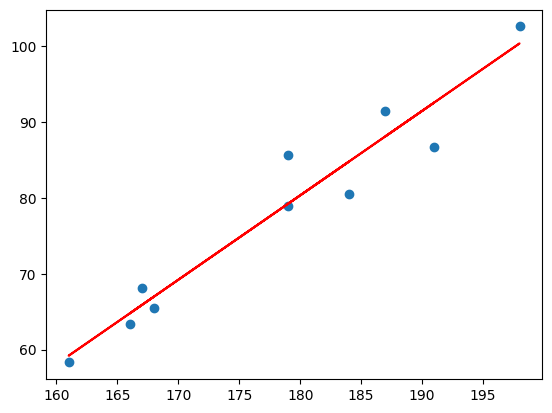

In [57]:
plt.scatter(student["x"], student["y"])
plt.plot(student["x"], fitStudents.fittedvalues, color="red")
plt.show()

Inspect the residuals (and assumption about normality):

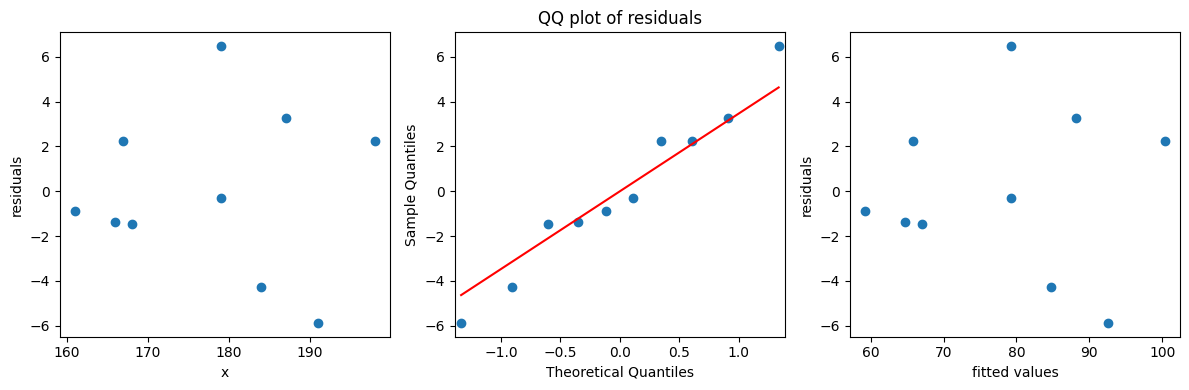

In [58]:
# residuals:
residuals = fitStudents.resid
fittedvalues = fitStudents.fittedvalues

fig, (ax0, ax1, ax2) = plt.subplots(1,3,figsize=(12,4))

# plot residuals versus x-values:
ax0.scatter(student["x"],student["residuals"])
ax0.set_xlabel("x")
ax0.set_ylabel("residuals")

# qq-plot of resiudals:
sm.qqplot(residuals,ax=ax1, line='s')
ax1.set_title("QQ plot of residuals")

# plot residuals versus fitted values:
ax2.scatter(fittedvalues,residuals)
ax2.set_xlabel("fitted values")
ax2.set_ylabel("residuals")

plt.tight_layout()
plt.show()


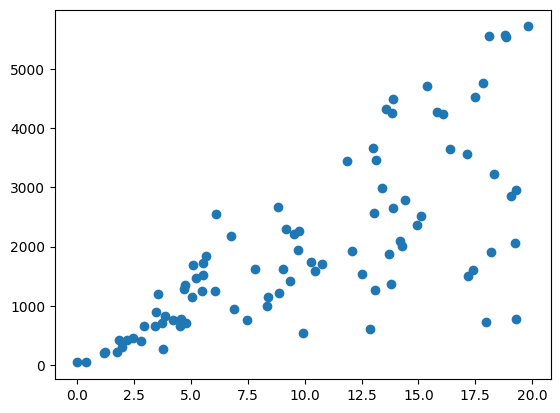

In [59]:
# Another example:

beta_0 = 50
beta_1 = 200
sigma = 90

# choose som random x-values:
x = stats.uniform.rvs(size = 90, loc=0, scale = 20)
# simulate y-values from statistical model:
y = beta_0 + beta_1*x + x*stats.norm.rvs(size = 90, loc=0, scale = sigma)

plt.scatter(x,y)
plt.show()

Is the normal assumption fulfilled here??

In [60]:

data = pd.DataFrame({'x': x, 'y': y})  # OBS: use the pandas library (pd)
linfit = smf.ols(formula = 'y ~ x', data=data).fit()

data["residuals"] = linfit.resid
fittedvalues = linfit.fittedvalues


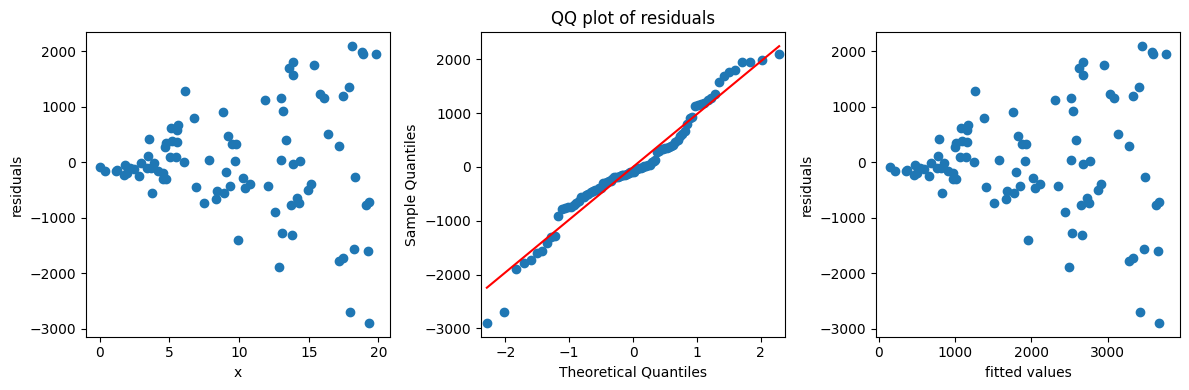

In [62]:

fig, (ax0, ax1, ax2) = plt.subplots(1,3,figsize=(12,4))

# plot residuals versus x-values:
ax0.scatter(data["x"],data["residuals"])
ax0.set_xlabel("x")
ax0.set_ylabel("residuals")

# qq-plot of resiudals:
sm.qqplot(data["residuals"],ax=ax1, line='s')
ax1.set_title("QQ plot of residuals")

# plot residuals versus fitted values:
ax2.scatter(fittedvalues,data["residuals"])
ax2.set_xlabel("fitted values")
ax2.set_ylabel("residuals")

plt.tight_layout()
plt.show()